# Nazwiska grupy
# Stanisław Kurzątkowski
# Patrycja Wysocka
# Łukasz Jaremek


In [1]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
from nltk.corpus import stopwords
import matplotlib.pyplot as plt            # library for visualization
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets
from nltk.classify import SklearnClassifier
from wordcloud import WordCloud, STOPWORDS


We can load the text fields of the positive and negative tweets by using the module's `strings()` method like this:

In [2]:
# select the set of positive and negative tweets
import nltk
nltk.download('twitter_samples')

import nltk
nltk.download('stopwords')

all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')


[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Studia\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Studia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


To make it easier, let us used pandas dataframe

In [3]:
# Create a dataframe from positive tweets
pos_tweet = pd.DataFrame(all_positive_tweets, columns=['Tweet'])
# Add a column to dataframe for positive sentiment value 1
pos_tweet['Sentiment'] = 1
# Create a temporary dataframe for negative tweets
neg_tweet = pd.DataFrame(all_negative_tweets, columns=['Tweet'])
# Add a column to temporary dataframe for negative sentiment value 0
neg_tweet['Sentiment'] = 0
# Combe positive and negative tweets in one single dataframe
df = pd.concat([neg_tweet, pos_tweet], ignore_index=True)
# df = pos_tweet.append(neg_tweet, ignore_index=True)
df = df.sample(frac = 1) 
df.reset_index(drop=True, inplace=True)


In [4]:
df


,Tweet,Sentiment
0,Tips ONLINE!\n6/7 WINNERS yesterday!\nJust 1 g...,0
1,@norman__g lucky spike only :-(,0
2,Wacky :D https://t.co/UThCcBQnKD,1
3,@EmmaLK Looks painful :(,0
4,"“@Johnny_Spacey: @Mandi_Tinker yes, very incon...",0
...,...,...
9995,@kapucumerve sakin ol :),1
9996,I don't think I can watch degrassi for about 4...,0
9997,I will fulfil all your fantasies :) 👉 http://t...,1
9998,:( lmfaoooo https://t.co/Gu0QjHPMnX,0


Next, we'll print a report with the number of positive and negative tweets. It is also essential to know the data structure of the datasets

In [5]:
# Displaying shape of dataset
print('Dataset size:',df.shape)
df.groupby('Sentiment').count()


Dataset size: (10000, 2)


,Tweet
Sentiment,
0,5000
1,5000


In [6]:
# Splitting the dataset into train and test set
train, test = train_test_split(df,test_size = 0.1)
train


,Tweet,Sentiment
4137,#FollowFriday @StayfanChemin @CCI_75 @aandreup...,1
1676,@my_nameis_dan Download only isn't it? :(,0
3479,The taxi driver thought me and Sophie worked f...,0
1500,@Dinnerbone *Future MegaMoh in 7/29/2015* Happ...,1
6379,@NotThatBobJames Hahaha Go Doug! :-),1
...,...,...
4574,"@BigMammaJosie lil bitch, Heiya, visit my site...",1
7684,@MandaScapinello oh yeah?? I am definitely goi...,1
5163,Bowling is always best with friends :) http://...,1
2061,@caylahhhh lmfao seriously??? I can't remember...,0


In [7]:
test

,Tweet,Sentiment
6373,@ThisOneNerd thank you! :D,1
3859,#FollowFriday @murtishaw @aqui_fr @FRTechStart...,1
8621,If you want a dm to justin let me know and I'l...,1
9847,i lagg so much on certain people :(,0
1847,@Miss_Dyna_Mite hi 5 back to you :) :),1
...,...,...
7269,♛♛♛\n》》》》 \nI LOVE YOU SO MUCH.\nI BELİEVE THA...,0
4537,@Anbu002 @Pranto_ahp Hey guys! We know about t...,1
516,im still giddy over d1 :-(,0
5923,"YKR SPARKY\n40mm, 3.5 grs\nROCKFISHING, topwat...",1


Positive words


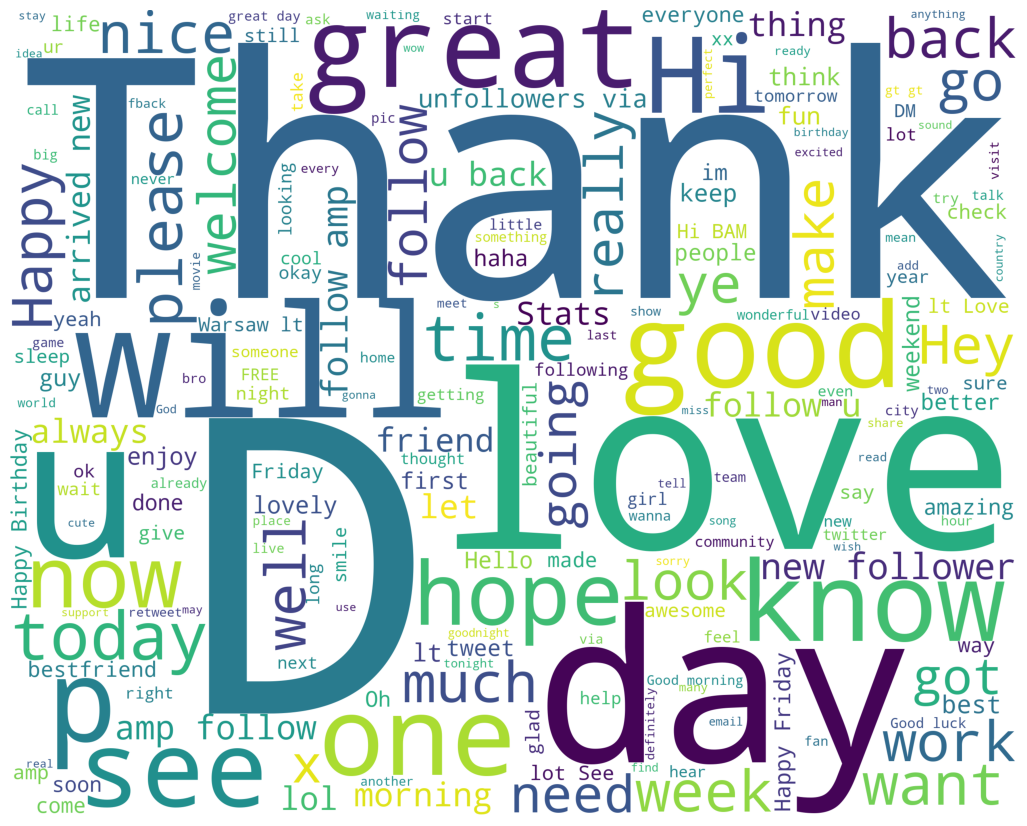

Negative words


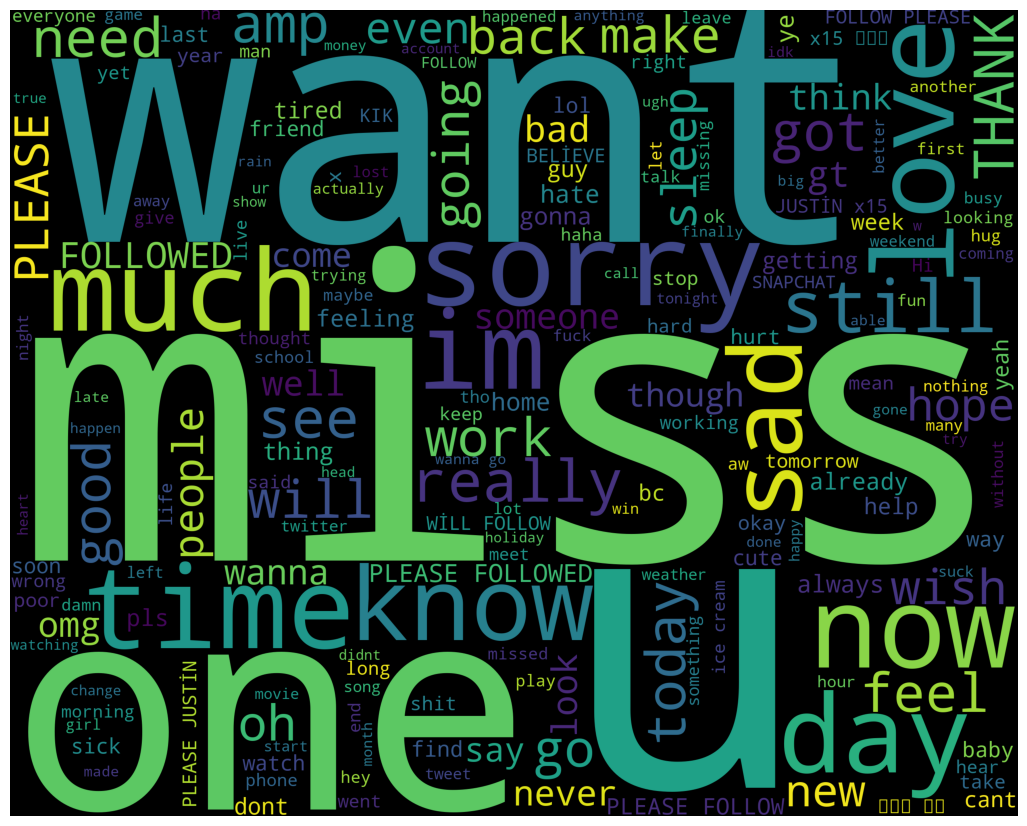

In [8]:
train_pos = train[ train['Sentiment'] == 1]
train_pos = train_pos['Tweet']
train_neg = train[ train['Sentiment'] == 0]
train_neg = train_neg['Tweet']


# def wordcloud_draw(data, color = 'black'):
#     words = ' '.join(data)
#     cleaned_word = " ".join([word for word in words.split()
#                             if 'http' not in word
#                                 and not word.startswith('@')
#                                 and not word.startswith('#')
#                                 and word != 'RT'
#                             ])

#     wordcloud = WordCloud(stopwords=STOPWORDS,
#                       background_color=color,
#                       width=2500,
#                       height=2000
#                      ).generate(cleaned_word)

#     plt.figure(1,figsize=(13, 13))
#     plt.imshow(wordcloud)
#     plt.axis('off')
#     plt.show()


# print("Positive words")
# wordcloud_draw(train_pos,'white')
# print("Negative words")
# wordcloud_draw(train_neg)


In [9]:
                
# tweets = []
# stopwords_set = set(stopwords.words("english"))

# for index, row in train.iterrows():
#     words_filtered = [e.lower() for e in row.Tweet.split() if len(e) >= 3]
#     words_cleaned = [word for word in words_filtered
#         if 'http' not in word
#         and not word.startswith('@')
#         and not word.startswith('#')
#         and word != 'RT']
#     words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
#     tweets.append((words_without_stopwords, row.Sentiment))

# test_pos = test[ test['Sentiment'] == 1]
# test_pos = test_pos['Tweet']
# test_neg = test[ test['Sentiment'] == 0]
# test_neg = test_neg['Tweet']


In [10]:
# # Extracting word features
# def get_words_in_tweets(tweets):
#     all = []
#     for (words, sentiment) in tweets:
#         all.extend(words)
#     return all


# def get_word_features(wordlist):
#     wordlist = nltk.FreqDist(wordlist)
#     features = wordlist.keys()
#     return features
# w_features = get_word_features(get_words_in_tweets(tweets))


# def extract_features(document):
#     document_words = set(document)
#     features = {}
#     for word in w_features:
#         features['contains(%s)' % word] = (word in document_words)
#     return features


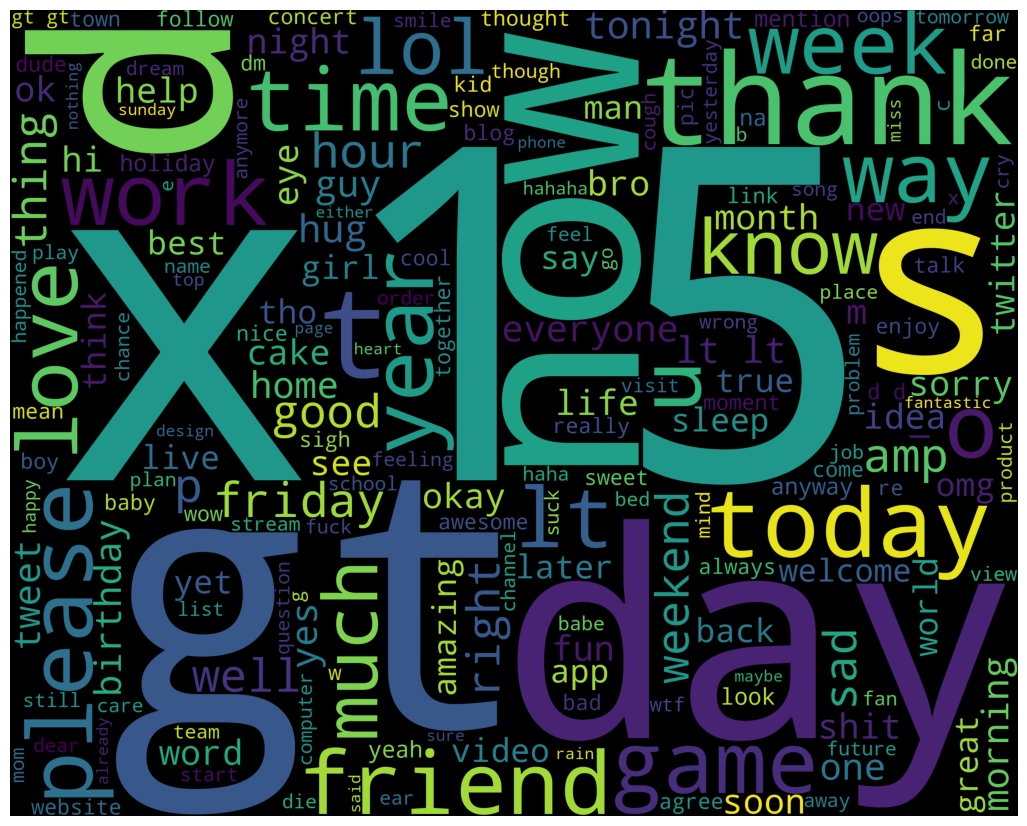

In [11]:
# wordcloud_draw(w_features)


In [12]:
# tweets

[(['top', 'influencers', 'community', 'week'], 1),
 (['download', 'it?'], 0),
 (['taxi',
   'driver',
   'thought',
   'sophie',
   'worked',
   'nintendo',
   'took',
   'gates',
   'security',
   'guards',
   'gave',
   'dirtiest',
   'looks',
   'haha'],
  0),
 (['*future', 'megamoh', '7/29/2015*', 'happy', 'birthday'], 1),
 (['hahaha', 'doug!', ':-)'], 1),
 (['liked', 'video', 'pasha', 'crying', 'terrible', 'donate'], 0),
 (['beat', 'beat', 'sits', 'well', '(includes', 'new', 'video)', ':-)'], 1),
 (['insurance',
   'loss/stolen',
   'accidentally',
   'damaged',
   'devices.',
   'warranty',
   'repairs',
   'sent',
   'repair',
   'centre.'],
  0),
 (['still', 'really', 'miss', 'purple', 'hair', 'tie'], 0),
 (['sometimes',
   'sometimes',
   'drown',
   'half',
   'bottle',
   'nyquil',
   'throat',
   'effect'],
  0),
 (['goodnight',
   'liam',
   'hope',
   'fantastic',
   'day',
   'today',
   'sweet',
   'dreams',
   'baby',
   'love',
   'heart',
   'xx.'],
  1),
 (['answer'

In [13]:
# # Training the Naive Bayes classifier
# training_set = nltk.classify.apply_features(extract_features, tweets)
# classifier = nltk.NaiveBayesClassifier.train(training_set)


In [14]:
# neg_cnt = 0
# pos_cnt = 0
# for obj in test_neg: 
#     res =  classifier.classify(extract_features(obj.split()))
#     if(res == 0): 
#         neg_cnt = neg_cnt + 1
# for obj in test_pos: 
#     res =  classifier.classify(extract_features(obj.split()))
#     if(res == 1): 
#         pos_cnt = pos_cnt + 1

# print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        
# print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))


## Useful links to start NLP 
<br>
https://realpython.com/python-nltk-sentiment-analysis/

In [15]:
models = (
    "nb",  # naive bayes
    "rf",  # random forest
    "lg",  # 
    "svm",  # svm
    "vader"
)

metrics = (
    "f1",
    "prec",
    "recal"
)


In [16]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Studia\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [17]:
train


,Tweet,Sentiment
4137,#FollowFriday @StayfanChemin @CCI_75 @aandreup...,1
1676,@my_nameis_dan Download only isn't it? :(,0
3479,The taxi driver thought me and Sophie worked f...,0
1500,@Dinnerbone *Future MegaMoh in 7/29/2015* Happ...,1
6379,@NotThatBobJames Hahaha Go Doug! :-),1
...,...,...
4574,"@BigMammaJosie lil bitch, Heiya, visit my site...",1
7684,@MandaScapinello oh yeah?? I am definitely goi...,1
5163,Bowling is always best with friends :) http://...,1
2061,@caylahhhh lmfao seriously??? I can't remember...,0


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score

tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.Tweet.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
                     if 'http' not in word
                     and not word.startswith('@')
                     and not word.startswith('#')
                     and word != 'RT']

    words_without_stopwords = [
        word
        for word in words_cleaned
        if not word in stopwords_set
        ]

    tweets.append((' '.join(words_without_stopwords), row.Sentiment))

tweet_texts, labels = zip(*tweets)

X_train, X_test, y_train, y_test = train_test_split(
    tweet_texts, labels, test_size=0.2, random_state=42
    )

models = {
    "nb": make_pipeline(CountVectorizer(), MultinomialNB()),  # Naive Bayes
    "rf": make_pipeline(CountVectorizer(), RandomForestClassifier()),  # Random Forest
    "lg": make_pipeline(CountVectorizer(), LogisticRegression()),  # Logistic Regression
    "svm": make_pipeline(CountVectorizer(), SVC()),  # Support Vector Machine
    "vader": SentimentIntensityAnalyzer()  # VADER - narzędzie do analizy sentymentu
}

results = {}

for name, model in models.items():
    if name != "vader":
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        y_pred = [
            1
            if models["vader"].polarity_scores(tweet)["compound"] > 0
            else 0
            for tweet in X_test
            ]

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[name] = {
        "F1": f1,
        "Precision": precision,
        "Recall": recall,
        
    }

df_results = pd.DataFrame(results).T

test_pos = test[test['Sentiment'] == 1]['Tweet']
test_neg = test[test['Sentiment'] == 0]['Tweet']


In [19]:
df_results.T


,nb,rf,lg,svm,vader
F1,0.742508,0.712684,0.730435,0.708333,0.655076
Precision,0.739227,0.756892,0.760870,0.786395,0.659142
Recall,0.745819,0.673356,0.702341,0.644370,0.651059


In [ ]:
from sklearn.model_selection import GridSearchCV


# Funkcja do tuningu hiperparametrów modeli
def tune_model(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=5)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_


# Definicja parametrów do tuningu dla każdego modelu
param_grids = {
    "nb": {
        'countvectorizer__ngram_range': [(1, 1), (1, 2)],
        'multinomialnb__alpha': [0.1, 0.5, 1.0]
    },
    "rf": {
        'countvectorizer__ngram_range': [(1, 1), (1, 2)],
        'randomforestclassifier__n_estimators': [100, 200],
        'randomforestclassifier__max_depth': [None, 10, 20]
    },
    "lg": {
        'countvectorizer__ngram_range': [(1, 1), (1, 2)],
        'logisticregression__C': [0.1, 1.0, 10.0],
        'logisticregression__solver': ['liblinear', 'lbfgs']
    },
    "svm": {
        'countvectorizer__ngram_range': [(1, 1), (1, 2)],
        'svc__C': [0.1, 1.0, 10.0],
        'svc__kernel': ['linear', 'rbf']
    }
}

# Tunowanie modeli i zapis najlepszych parametrów
best_models = {}
best_params = {}

for name, model in models.items():
    if name != "vader":
        print(f"Tuning modelu: {name}")
        best_model, best_param = tune_model(model, param_grids[name], X_train, y_train)
        best_models[name] = best_model
        best_params[name] = best_param

# Wyświetlanie najlepszych parametrów
for name, params in best_params.items():
    print(f"Najlepsze parametry dla {name}: {params}")

# Ocena najlepszych modeli
# results_tuned = {}

# for name, model in best_models.items():
#     # Predykcja na danych testowych przy użyciu najlepszych modeli
#     y_pred = model.predict(X_test)
    
#     # Obliczanie metryk
#     precision = precision_score(y_test, y_pred)
#     recall = recall_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)
    
#     # Zapis wyników dla modelu
#     results_tuned[name] = {
#         "Precision": precision,
#         "Recall": recall,
#         "F1": f1
#     }

# # Wyświetlanie wyników
# df_results_tuned = pd.DataFrame(results_tuned).T
# import ace_tools as tools; tools.display_dataframe_to_user(name="Tuned Model Performance", dataframe=df_results_tuned)


Tuning modelu: nb
Tuning modelu: rf
